In [57]:
import pandas as pd
data = pd.read_csv('.\\Data\\merged.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10260 non-null  int64 
 1   Date        10260 non-null  object
 2   HomeTeam    10260 non-null  object
 3   AwayTeam    10260 non-null  object
 4   FTHG        10260 non-null  int64 
 5   FTAG        10260 non-null  int64 
 6   FTR         10260 non-null  object
dtypes: int64(3), object(4)
memory usage: 561.2+ KB


In [58]:
data.head(10)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,0,10/08/2018,Man United,Leicester,2,1,H
1,1,11/08/2018,Bournemouth,Cardiff,2,0,H
2,2,11/08/2018,Fulham,Crystal Palace,0,2,A
3,3,11/08/2018,Huddersfield,Chelsea,0,3,A
4,4,11/08/2018,Newcastle,Tottenham,1,2,A
5,5,11/08/2018,Watford,Brighton,2,0,H
6,6,11/08/2018,Wolves,Everton,2,2,D
7,7,12/08/2018,Arsenal,Man City,0,2,A
8,8,12/08/2018,Liverpool,West Ham,4,0,H
9,9,12/08/2018,Southampton,Burnley,0,0,D


In [59]:
data.describe()

,Unnamed: 0,FTHG,FTAG
count,10260.000000,10260.000000,10260.000000
mean,5129.500000,1.497953,1.246296
std,2961.951215,1.302369,1.211063
min,0.000000,0.000000,0.000000
25%,2564.750000,1.000000,0.000000
50%,5129.500000,1.000000,1.000000
75%,7694.250000,2.000000,2.000000
max,10259.000000,9.000000,9.000000


In [60]:
import numpy as np
# Max Goal Match
data.loc[[np.argmax(data.FTAG + data.FTHG)]]

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
470,470,25/10/2019,Southampton,Leicester,0,9,A


([<matplotlib.axis.XTick at 0x25283352e20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

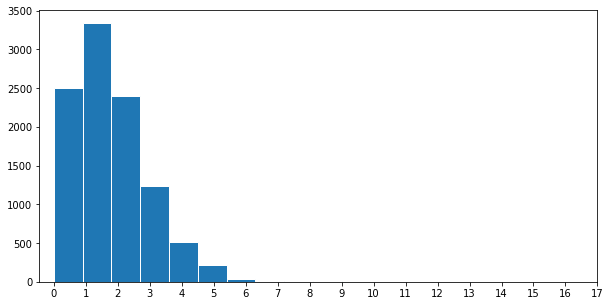

In [61]:
# most_probable home score
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.FTHG,bins=10,edgecolor='white')
plt.xticks(range(18))

([<matplotlib.axis.XTick at 0x2528397a400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

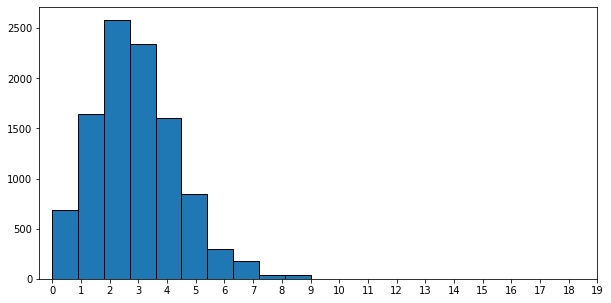

In [62]:
import matplotlib.pyplot as plt
# data.total= data.FTAG + data.FTHG
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.FTHG + data.FTAG,bins=10,edgecolor='black')
plt.xticks(range(20))

array([[<AxesSubplot:xlabel='FTHG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTHG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTAG'>]], dtype=object)

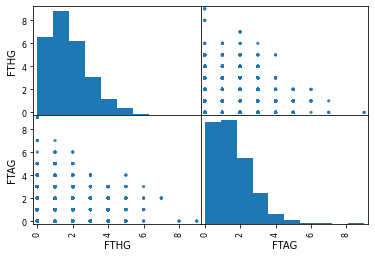

In [70]:
pd.plotting.scatter_matrix(data[['FTHG', 'FTAG']])

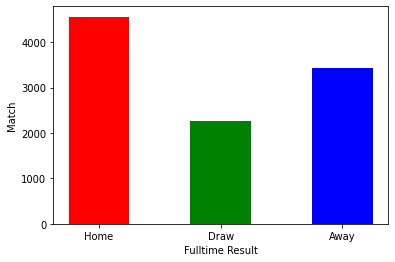

In [63]:
# H_A_D counting
import matplotlib.pyplot as plt
def resultAllMatch():
    countH, countA, countD = 0,0,0
    for index, match in data.iterrows():
        if match.FTR == 'H':
            countH += 1
        elif match.FTR == 'A':
            countA += 1
        else:
            countD += 1
    x = np.arange(3)
    width = 0.5
    plt.bar(x, [countH, countD, countA], width, color=['red', 'green', 'blue'])
    plt.xlabel("Fulltime Result")
    plt.ylabel("Match")
    bars = ("Home", "Draw", "Away")
    plt.xticks(x, bars)
resultAllMatch()

WIN RATE: 78.56%
DRAW RATE: 10.72%
LOSE RATE: 10.72%


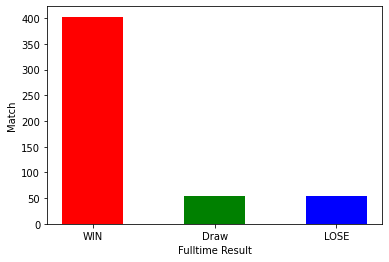

In [64]:

def homePerformance(team):
    countW, countL, countD = 0,0,0
    for index, match in data.iterrows():
        if str(match.HomeTeam) == team:
            if match.FTR == 'H':
                countW += 1
            elif match.FTR == 'A':
                countL += 1
            else:
                countD += 1
    print('WIN RATE: {:.2f}%\nDRAW RATE: {:.2f}%\nLOSE RATE: {:.2f}%'.format(
        100*countW/(countW+countD+countL),
        100*countD/(countW+countD+countL),
        100*countL/(countW+countD+countL))
        )
    x = np.arange(3)
    width = 0.5
    plt.bar(x, [countW, countD, countL], width, color=['red', 'green', 'blue'])
    plt.xlabel("Fulltime Result")
    plt.ylabel("Match")
    bars = ("WIN", "Draw", "LOSE")
    plt.xticks(x, bars)
homePerformance('Man City')

In [65]:
def listMatch(t1, t2):
    for index, match in data.iterrows():
        if match.HomeTeam == t1 and match.AwayTeam == t2 or match.HomeTeam == t2 and match.AwayTeam == t1:
            print('{0},\t {1} \t{2} V {3} \t{4}'.format(match.Date, match.HomeTeam, match.FTHG, match.FTAG, match.AwayTeam))

listMatch('Man City', 'Man United') 

11/11/2018,	 Man City 	3 V 1 	Man United
24/04/2019,	 Man United 	0 V 2 	Man City
07/12/2019,	 Man City 	1 V 2 	Man United
08/03/2020,	 Man United 	2 V 0 	Man City
12/12/2020,	 Man United 	0 V 0 	Man City
07/03/2021,	 Man City 	0 V 2 	Man United
11/11/2018,	 Man City 	3 V 1 	Man United
24/04/2019,	 Man United 	0 V 2 	Man City
07/12/2019,	 Man City 	1 V 2 	Man United
08/03/2020,	 Man United 	2 V 0 	Man City
12/12/2020,	 Man United 	0 V 0 	Man City
07/03/2021,	 Man City 	0 V 2 	Man United
11/11/2018,	 Man City 	3 V 1 	Man United
24/04/2019,	 Man United 	0 V 2 	Man City
07/12/2019,	 Man City 	1 V 2 	Man United
08/03/2020,	 Man United 	2 V 0 	Man City
12/12/2020,	 Man United 	0 V 0 	Man City
07/03/2021,	 Man City 	0 V 2 	Man United
11/11/2018,	 Man City 	3 V 1 	Man United
24/04/2019,	 Man United 	0 V 2 	Man City
07/12/2019,	 Man City 	1 V 2 	Man United
08/03/2020,	 Man United 	2 V 0 	Man City
12/12/2020,	 Man United 	0 V 0 	Man City
07/03/2021,	 Man City 	0 V 2 	Man United
10/09/16,	 Man U

In [66]:
from statsmodels.stats import proportion
conf=proportion.proportion_confint((data['FTR']=='H').sum(), data['FTR'].count(), alpha=0.05, method='normal')
print('The chance of home team to win with %95 confidence interval falls in :{}'.format(conf))

The chance of home team to win with %95 confidence interval falls in :(0.43473224250182657, 0.4539617146131832)


C:\Users\duyvu\AppData\Local\Temp/ipykernel_33820/1690472479.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  poisson_pred = np.column_stack([[poisson.pmf(i, data.mean()[j]) for i in range(8)] for j in range(2)])


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (9).

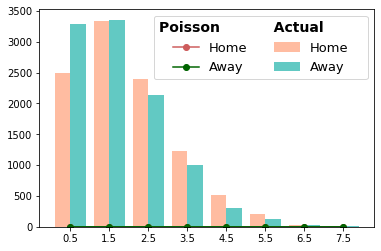

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson,skellam

# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(i, data.mean()[j]) for i in range(8)] for j in range(2)])

# plot histogram of actual goals
plt.hist(data[['FTHG', 'FTAG']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'], color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (EPL 2016/17 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()